In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv("news.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
df.drop(labels=["Unnamed: 0"], inplace=True, axis=1)

In [ ]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

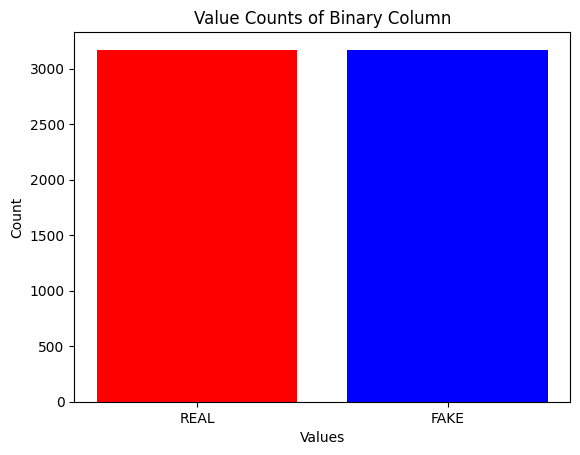

In [ ]:
# Visualize the label column bar chart using matplotlib
value_counts = df['label'].value_counts()

# Create a bar chart
plt.bar(value_counts.index, value_counts.values, color=["red", "blue"])

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts of Binary Column')

# Show the plot
plt.show()

In [ ]:
x = df.iloc[ : , :-1].values
y = df.iloc[ : , -1].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english",max_features=1000)

In [ ]:
x1=vect.fit_transform(x[:,0]).todense()
x2=vect.fit_transform(x[:,1]).todense()
x_mat=np.hstack((x1,x2))

In [ ]:
x_mat.shape

(6335, 2000)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_mat,y,random_state=1000)

In [ ]:
np.asarray(x_train)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 4, 2]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their candidate values
param_grid = {
    'max_depth': [2, 4, 8, 16, 32, 64, None],
    'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
    'n_estimators': [10, 50, 100, 500]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=1000)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit GridSearchCV on the data
grid_search.fit(np.asarray(x_train), np.asarray(y_train))

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=RandomForestClassifier(n_estimators = 500,max_depth = None,min_samples_split = 2)
model.fit(np.asarray(x_train),np.asarray(y_train))
y_pred=model.predict(np.asarray(x_test))
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_pred,np.asarray(y_test))
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 0.90
